In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns


In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
label_code = {
    'EAP': 0,
    'HPL': 1,
    'MWS': 2
}

In [4]:
author_code = {v:k for k,v in label_code.items()}

In [5]:
author_code

{0: 'EAP', 1: 'HPL', 2: 'MWS'}

In [6]:
df['author'] = pd.Series(list(map(lambda x: label_code[x], df['author'])))

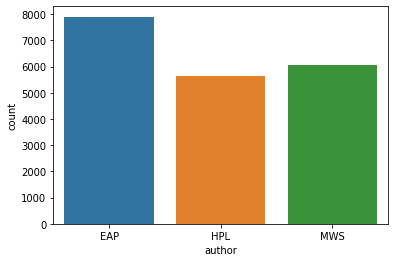

In [20]:
ax = sns.countplot(x="author",data=df)
plt.xticks(range(0,len(author_code.values())), author_code.values())
plt.savefig('plots/dist.png')
plt.show()

In [29]:
print(author_code[2])
df[df['author'] == 2]['text'].iloc[453]

MWS


'The revenue of its possessor, which had always found a mode of expenditure congenial to his generous nature, was now attended to more parsimoniously, that it might embrace a wider portion of utility.'

In [168]:
test = pd.read_csv('data/test.csv')
len(test)

8392

In [25]:
df['len'] = df['text'].apply(len)

In [133]:
def plot_hist(au, feat, bins = 100):
    plt.hist(df[df['author'] == au][feat], bins = bins)
    plt.xlabel(author_code[au])
    plt.ylabel(feat)
    plt.savefig('plots/{}_{}.png'.format(author_code[au], feat))
    plt.show()

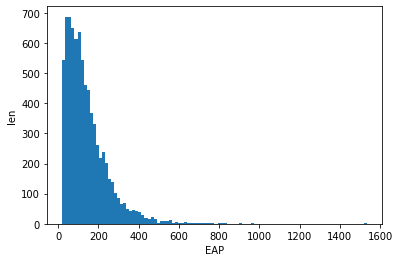

In [134]:
plot_hist(0, 'len')

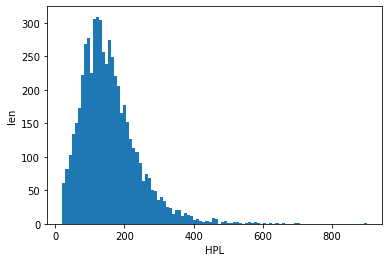

In [135]:
plot_hist(1, 'len')

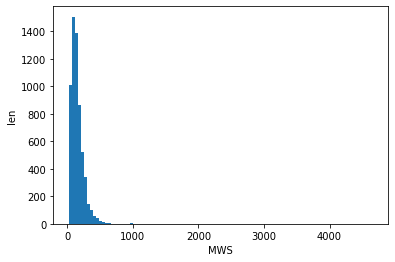

In [136]:
plot_hist(2, 'len')

Outliers present for all the authors in terms of length

In [137]:
def get_puncts(x):
    count = lambda l1,l2: sum([1 for x in l1 if x in l2])
    return count(x, string.punctuation)

In [138]:
df['puncts'] = df['text'].apply(get_puncts)

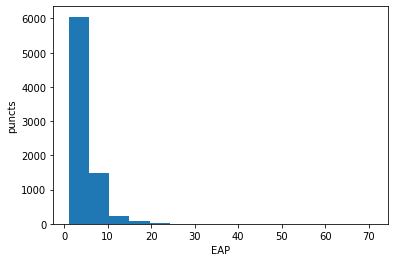

In [139]:
plot_hist(0, 'puncts', 15)

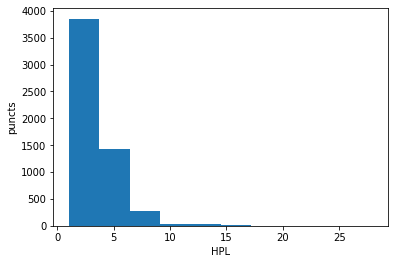

In [140]:
plot_hist(1, 'puncts', 10)

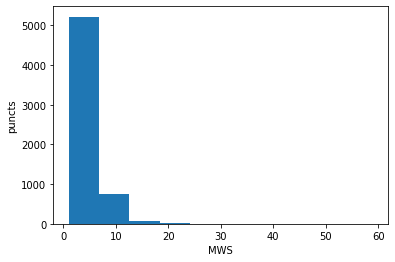

In [141]:
plot_hist(2, 'puncts', 10)

In [157]:
def get_words(x):
    return len([w for w in x.split(' ')])

def get_ave_len(x):
    return np.mean([len(w) for w in word_tokenize(x)])

stop_words = set(stopwords.words("english"))
def num_stop_words(x):
    return len([w for w in word_tokenize(x) if w in stop_words])

In [143]:
df['num_words'] = df['text'].apply(get_words)

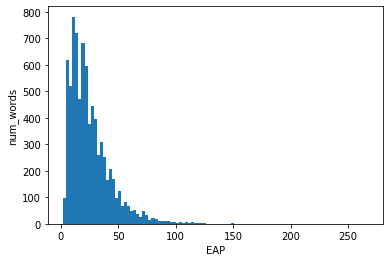

In [144]:
plot_hist(0, 'num_words')

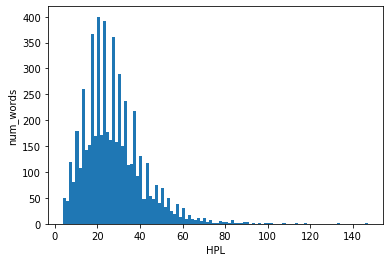

In [145]:
plot_hist(1, 'num_words')

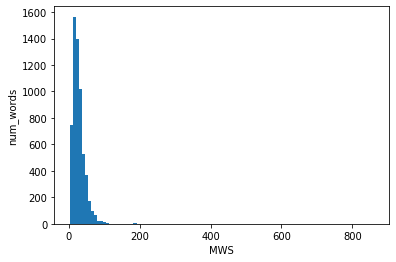

In [146]:
plot_hist(2, 'num_words')

In [147]:
df['ave_len_word'] = df['text'].apply(get_ave_len)

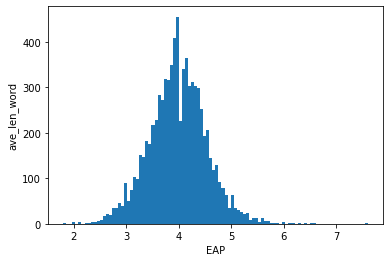

In [148]:
plot_hist(0, 'ave_len_word')

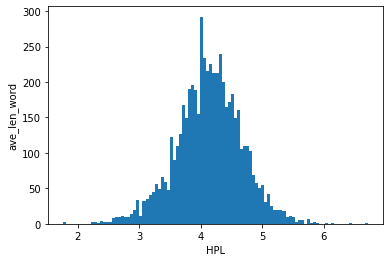

In [149]:
plot_hist(1, 'ave_len_word')

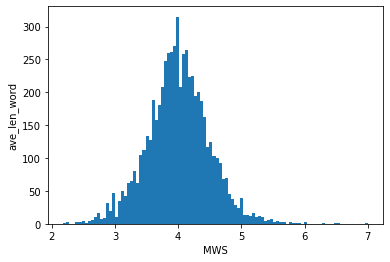

In [150]:
plot_hist(2, 'ave_len_word')

In [158]:
df['num_stop_words'] = df['text'].apply(num_stop_words)

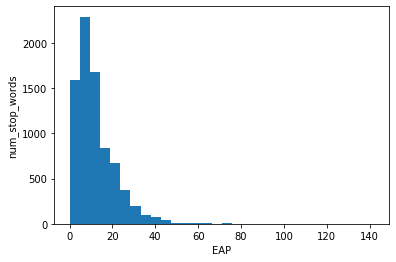

In [164]:
plot_hist(0, 'num_stop_words', 30)

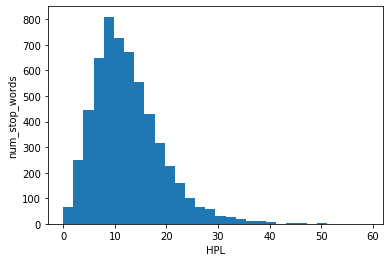

In [165]:
plot_hist(1, 'num_stop_words', 30)

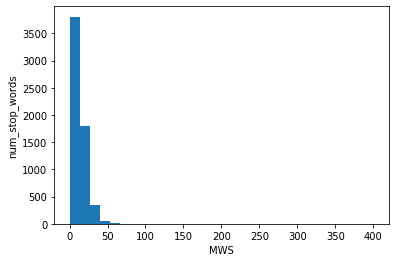

In [166]:
plot_hist(2, 'num_stop_words', 30)